# pHash и GIST

In [8]:
import gist
import numpy as np
import pandas as pd
import sklearn as sk
import random
import time
import math as mat
import imagehash
import matplotlib.pyplot as plt
from PIL import Image
from skimage import transform
from sklearn.neighbors import BallTree
from sklearn.neighbors import DistanceMetric
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Загружаем датасет

In [17]:
path = '/home/subster2/Рабочий стол/Диплом/memsgenerator/memegenerator1.csv'
df = pd.read_csv(path, sep=',', encoding ='utf-16')
df = df.drop(df[df['Base Meme Name'].isna()].index).reset_index(drop = True)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text
47063,28556956,http://webarchive.loc.gov/all/https://cdn.meme...,Relatable Romney,http://memegenerator.net/instance/28556956,b9c0239add9ab9d73b995589c8b64c3f,14840.0,i can see the planet kolob from my condo on mars
47064,28557560,http://webarchive.loc.gov/all/https://cdn.meme...,Grumpy Cat,http://webarchive.loc.gov/all/0/http://memegen...,9646b550aafb9cf05739669bf841a99e,13153.0,Ты не пьешь травку
47065,28557661,http://webarchive.loc.gov/all/http://cdn.meme....,Picard Hates,http://memegenerator.net/instance/28557661,d63b24e7e2067b716f4e79f8c2fe6df3,13400.0,i get my visions from the sucking of your mom
47066,28557684,http://webarchive.loc.gov/all/http://cdn.meme....,FU*CK THAT GUY,http://webarchive.loc.gov/all/0/http://memegen...,408571e91e1d1cc89b19704948ef7db0,10594.0,группа временно приостановила свою деятельность
47067,28557694,http://webarchive.loc.gov/all/https://cdn.meme...,Inappropriate Timing Bill Clinton,http://webarchive.loc.gov/all/0/http://memegen...,1fa497c479bee56e2387a0ad2b35fe67,14155.0,Did somebody say binders full of women???
47068,28558783,http://webarchive.loc.gov/all/http://cdn.meme....,Venger,http://webarchive.loc.gov/all/0/http://memegen...,8c795ce6dd391e38d6d2293862ae8c5d,13870.0,ВЫИГРАЛ ЛИГУ ЧЕМПИОНОВ долго играл в PES 2013
47069,28558928,http://webarchive.loc.gov/all/http://cdn.meme....,Bad Luck Brian,http://webarchive.loc.gov/all/0/http://memegen...,fa561dfa0643f705596d74e086f23062,13796.0,throws banana in mario kart slips on it next lap
47070,28559640,http://webarchive.loc.gov/all/http://cdn.meme....,Well hello there!,http://memegenerator.net/instance/28559640,caedce677d8ca7aaf422bae46dde31d7,17958.0,HELLO
47071,28559671,http://webarchive.loc.gov/all/http://cdn.meme....,roleplayercat,http://webarchive.loc.gov/all/0/http://memegen...,8a442e67d91a2d1d81e5d4afbafd9cd6,11205.0,Lo vamos a petar
47072,28559755,http://webarchive.loc.gov/all/http://cdn.meme....,Angry School Boy,http://webarchive.loc.gov/all/0/http://memegen...,360dda9f515bcd2a5d44f2470bdea05c,14497.0,НАХ ТЫ МЕНЯ УДАРИЛ? БОЛЬНО ЖЕ А МНЕ ЗНАЕШЬ КА...


### Функция пресижн/реколл

In [3]:
def RecPrec(N,hashFunc,xstart=1,xfinish=25, rad = 1, ifprint = 'Print'):# номер картинки,хешфункция,от, до, радиус, печать графика
    valueRec=[]
    valuePrec=[]
    indRadius=[]
    tmpltNme = df['Base Meme Name'][N] #название шаблона
    lenoftmplt = len(df[df['Base Meme Name']== tmpltNme])#кол-во картинок с базовым шаблоном в фрейме
    for radius in np.arange(xstart, xfinish):
        ind = tree.query_radius(hashFunc[N:N+1], r=radius/rad)  #индексы похожих эл-ов
        sumRaP=0
#         for i in ind[0]:  вернуть если что
#                 if((df['Base Meme Name'][i]== tmpltNme)): #мемы, название которых совпадает с шаблоном
#                     sumRaP+=1
        sumRaP=sum(df['Base Meme Name'][ind[0]].values== tmpltNme)        
        valueRec.append(sumRaP/lenoftmplt)#recall(делим на кол-во всех картинок шаблона)
        valuePrec.append(sumRaP/len(ind[0]))#precision(делим на кол-во близких картинок)
        indRadius.append(radius)
    if(ifprint == 'Print'):
        plt.plot(indRadius,valueRec,color = 'red')#recall красный
        plt.plot(indRadius,valuePrec,color = 'blue')#precision голубой
        plt.xlabel('Радиус')
    return valueRec,valuePrec

### Считаем GIST

In [4]:
%%time
#считаем хэш
global imgGist 
imgGist = []
imsize = (32, 32)
count = 0
for i in df['Meme ID']:
    path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(i)# путь к папке
    j = np.asarray(Image.open(path_to_image))#
    img_resized = transform.resize(j, imsize, preserve_range=True).astype(np.uint8)
    desc = gist.extract(img_resized)
    imgGist.append(desc)# добавляем в массив новый Gist
    count+=1
    if(count%10000==0):
        print(count)

10000
20000
30000
40000
50000
CPU times: user 22min 46s, sys: 20min 18s, total: 43min 5s
Wall time: 14min 25s


In [5]:
#метрика
metrics=DistanceMetric.get_metric('euclidean')
tree = BallTree(imgGist, metric=metrics)

In [12]:
# Просмотр шаблонов


for i in df['Base Meme Name'].unique():
    print(df[df['Base Meme Name']==i][:1].index[0])
    print(i)
    k = df[df['Base Meme Name']==i][:1].index[0]
    for j in df[df['Base Meme Name']==i].index:
        path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(df['Meme ID'][j])
        display(Image(filename = path_to_image, width=100, height=100))
    print(RecPrec(k,0,3))
    time.sleep(20)
len(df['Base Meme Name'].unique())


#print(df[df['Base Meme Name'] == 'Spiderman Approves']['Meme ID'])
#path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(df['Meme ID'][53859])
#Image(filename = path_to_image, width=100, height=100)



57617
0
10000
20000
30000
40000
50000
[ 2012.1423811  49013.98936753] [57604.56666667 43483.08562772]
CPU times: user 1h 43min 50s, sys: 26.4 ms, total: 1h 43min 50s
Wall time: 1h 43min 50s


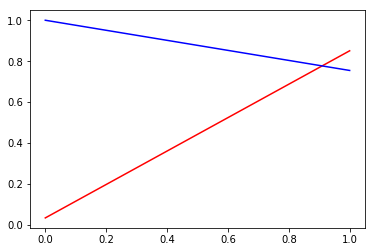

In [18]:
%%time

#N = len(df['Base Meme Name'].unique())
N = df.shape[0]
print(N)  

def add(x, y):
        return list(map(lambda a, b: a + b, x, y))
    
sumRecprec = RecPrec(N = 0,hashFunc = imgGist,xstart=0,xfinish =2, ifprint = 0)
for i in range(df.shape[0]):
    x = RecPrec(N = i,hashFunc = imgGist,xstart=0,xfinish =2, ifprint = 0)
    sumRecprec = add(sumRecprec[0],x[0]),add(sumRecprec[1],x[1])
    if(i%10000==0):
        print(i)
    
asd = np.asarray(sumRecprec[0])
asd2 = np.asarray(sumRecprec[1])
print(asd, asd2)
plt.plot(range(0,2),asd/N,color = 'red')#recall красный
plt.plot(range(0,2),asd2/N,color = 'blue')#precisition голубой

### Считаем ImageHash


In [19]:
%%time
global imgH
imgH = []
for i in df['Meme ID']:
    path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(i)# путь к папке
    j = imagehash.phash(Image.open(path_to_image))# строим pHash
    imgH.append(np.ndarray.flatten(j.hash))# добавляем в массив новый pHash

CPU times: user 1min 19s, sys: 864 ms, total: 1min 20s
Wall time: 1min 20s


In [21]:
# метрика
metrics=DistanceMetric.get_metric('hamming')
tree = BallTree(imgH, metric=metrics)

57617
0
10000
20000
30000
40000
50000
[38690.31561589 38690.31561589 45455.86203314 45455.86203314
 50035.8890134  50035.8890134  52858.91858493 52858.91858493] [49747.41810684 49747.41810684 47954.79470657 47954.79470657
 44022.65586937 44022.65586937 35842.01712708 35842.01712708]
CPU times: user 2h 32min 7s, sys: 106 ms, total: 2h 32min 7s
Wall time: 2h 32min 7s


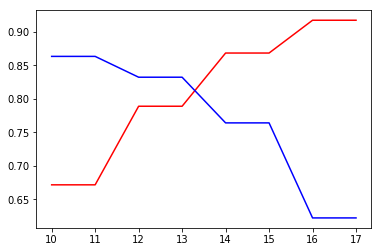

In [23]:
%%time
#N = len(df['Base Meme Name'].unique())  
N = df.shape[0]
print(N)  

def add(x, y):
        return list(map(lambda a, b: a + b, x, y))
    
sumRecprec = RecPrec(N = 0,hashFunc = imgH,xstart=10,xfinish =18,rad = 64, ifprint = 0)
for i in range(df.shape[0]):
    x = RecPrec(N = i,hashFunc = imgH,xstart=10,xfinish =18,rad = 64, ifprint = 0)
    sumRecprec = add(sumRecprec[0],x[0]),add(sumRecprec[1],x[1])
    if(i%10000==0):
        print(i)
    
asd = np.asarray(sumRecprec[0])
asd2 = np.asarray(sumRecprec[1])
print(asd, asd2)
plt.plot(range(10,18),asd/N,color = 'red')#recall красный
plt.plot(range(10,18),asd2/N,color = 'blue')#precisition голубой